In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

# Load the dataset
df = pd.read_csv("Cluster attempt - Leap - 12.csv")


replace_values = {'Total Paid-To-Date': ' $-   '}
df.replace(replace_values, np.nan, inplace=True)

# Handle missing values for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Handle missing values for non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df[non_numeric_columns] = non_numeric_imputer.fit_transform(df[non_numeric_columns])

# Convert relevant columns to appropriate data types
try:
    df['Next Payment Due Date'] = pd.to_datetime(df['Next Payment Due Date'])
    df['Account Last Visit'] = pd.to_datetime(df['Account Last Visit'], errors='coerce')
    df['Total Paid-To-Date'] = pd.to_numeric(df['Total Paid-To-Date'].replace('[\$,]', '', regex=True), errors='coerce')
except ValueError as e:
    print(f"Error converting to numeric: {e}")

# Extract meaningful features from date columns
df['Next Payment Due Month'] = df['Next Payment Due Date'].dt.month
df['Account Last Visit Month'] = df['Account Last Visit'].dt.month

# Feature Selection
selected_features = ['Current Monthly Cost Per License', 'Total Paid-To-Date', 'Current MRR', 'Rough LTV', 'Current SalesPro MRR']

# Remove rows with NaN values in selected features
df = df.dropna(subset=selected_features)

# Ensure selected features are numeric
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Impute missing values for 'Rough LTV'
df['Rough LTV'].fillna(df['Rough LTV'].mean(), inplace=True)

# Drop rows with NaN values in 'Account Last Visit'
df.dropna(subset=['Account Last Visit'], inplace=True)

# Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_features])

# Cluster Analysis
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


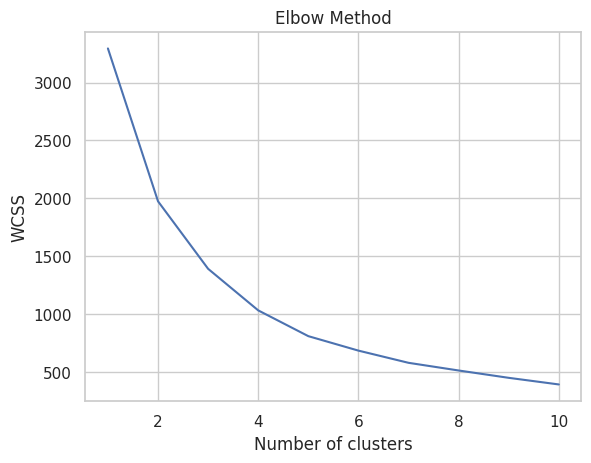

In [ ]:
# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [ ]:
# Based on the Elbow Method, choose the optimal number of clusters
optimal_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

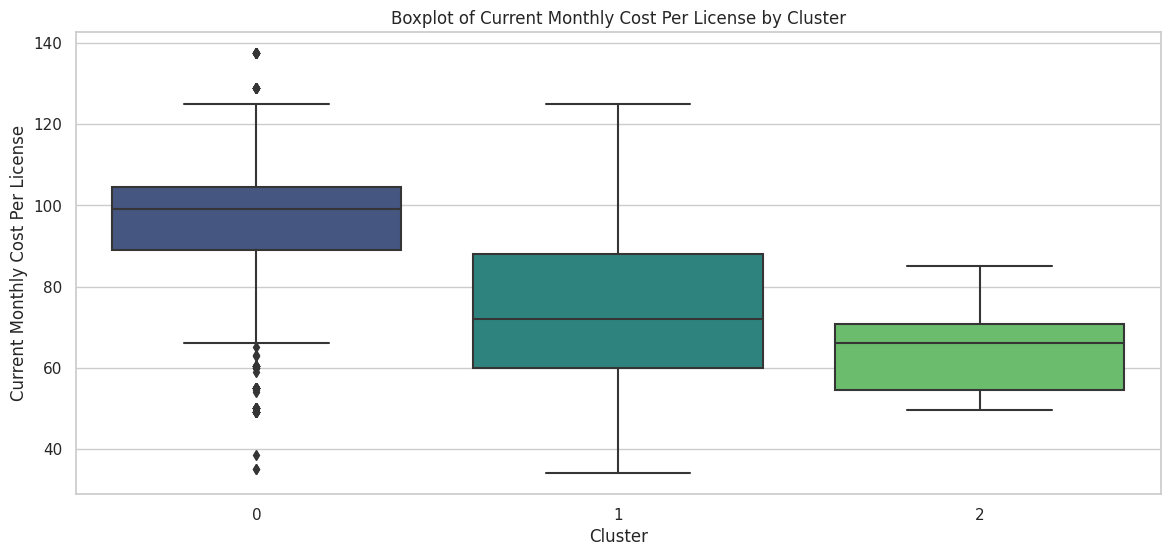

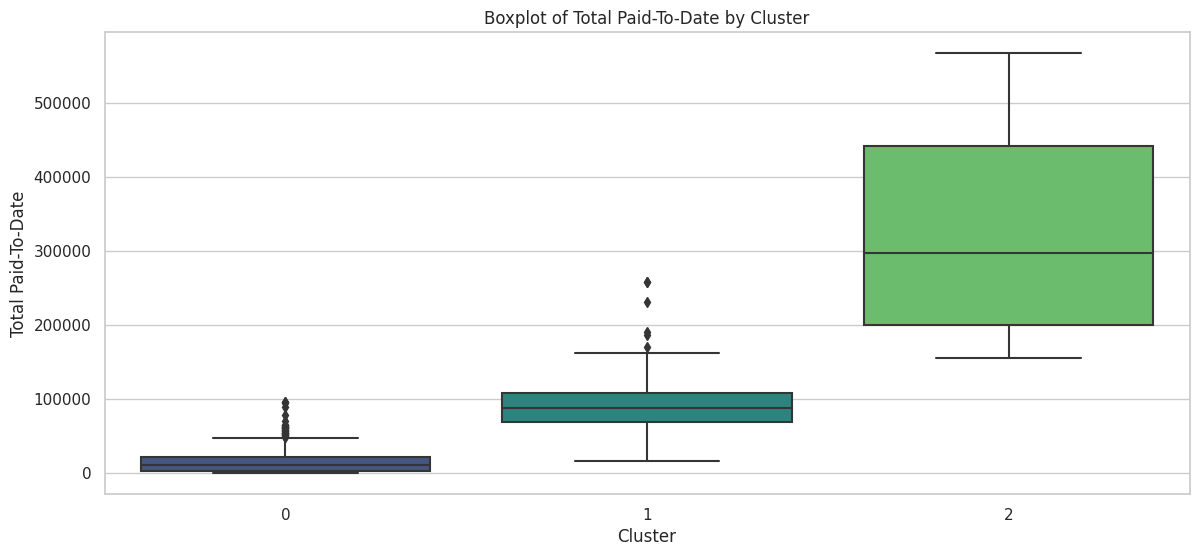

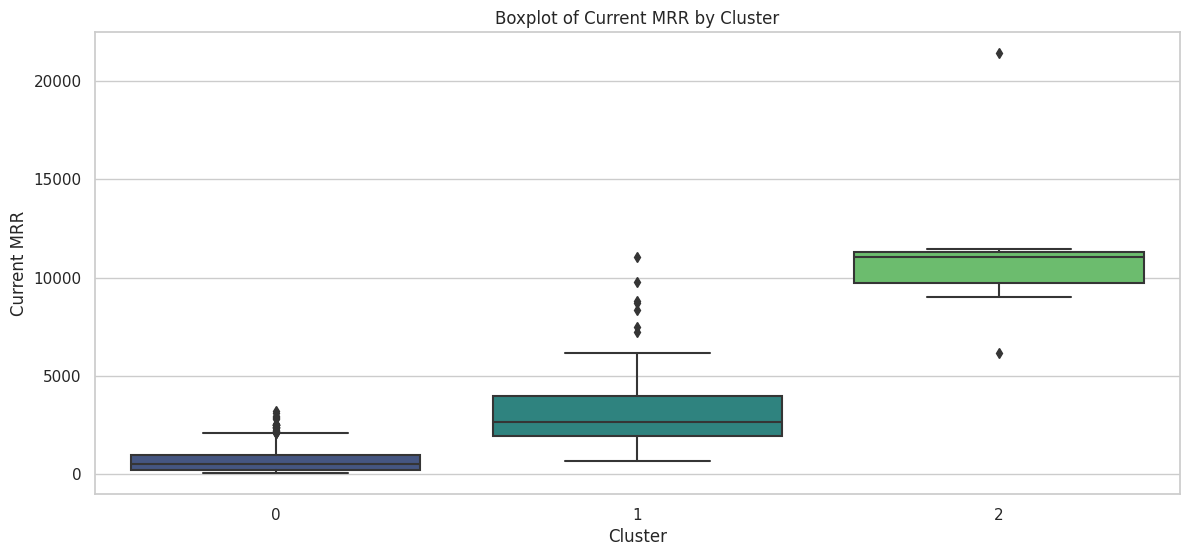

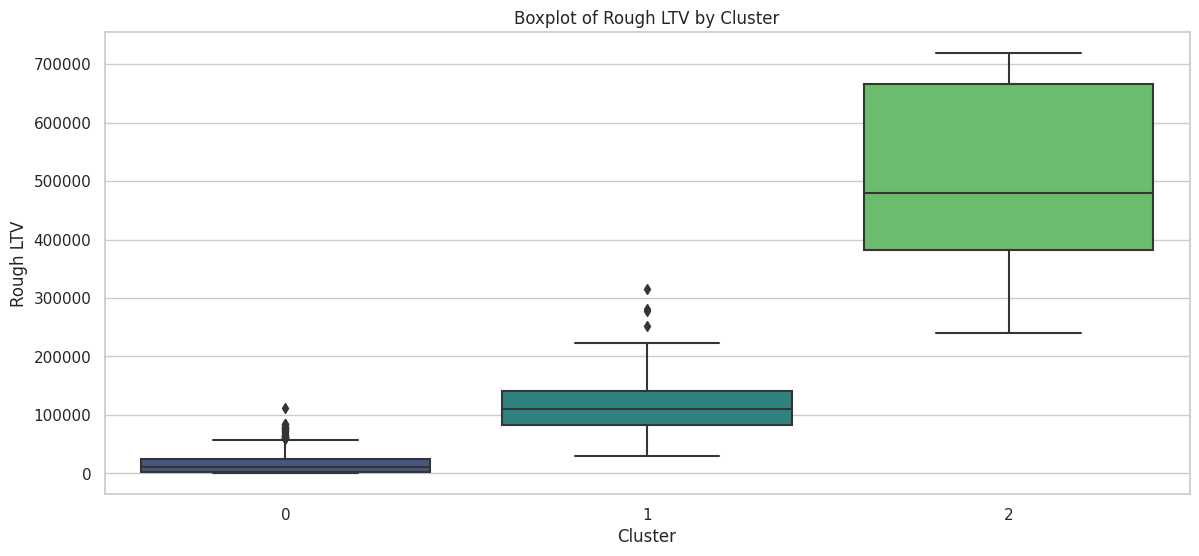

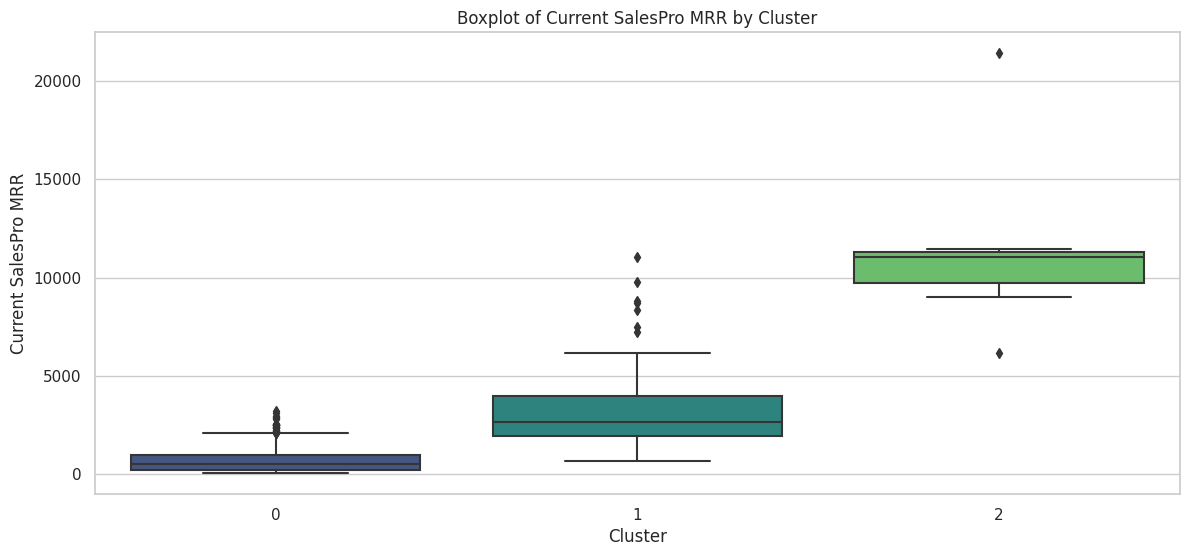

In [ ]:
# Boxplot for each selected feature by cluster
for feature in selected_features:
    plt.figure(figsize=(14, 6))  # Adjust the figsize as needed
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

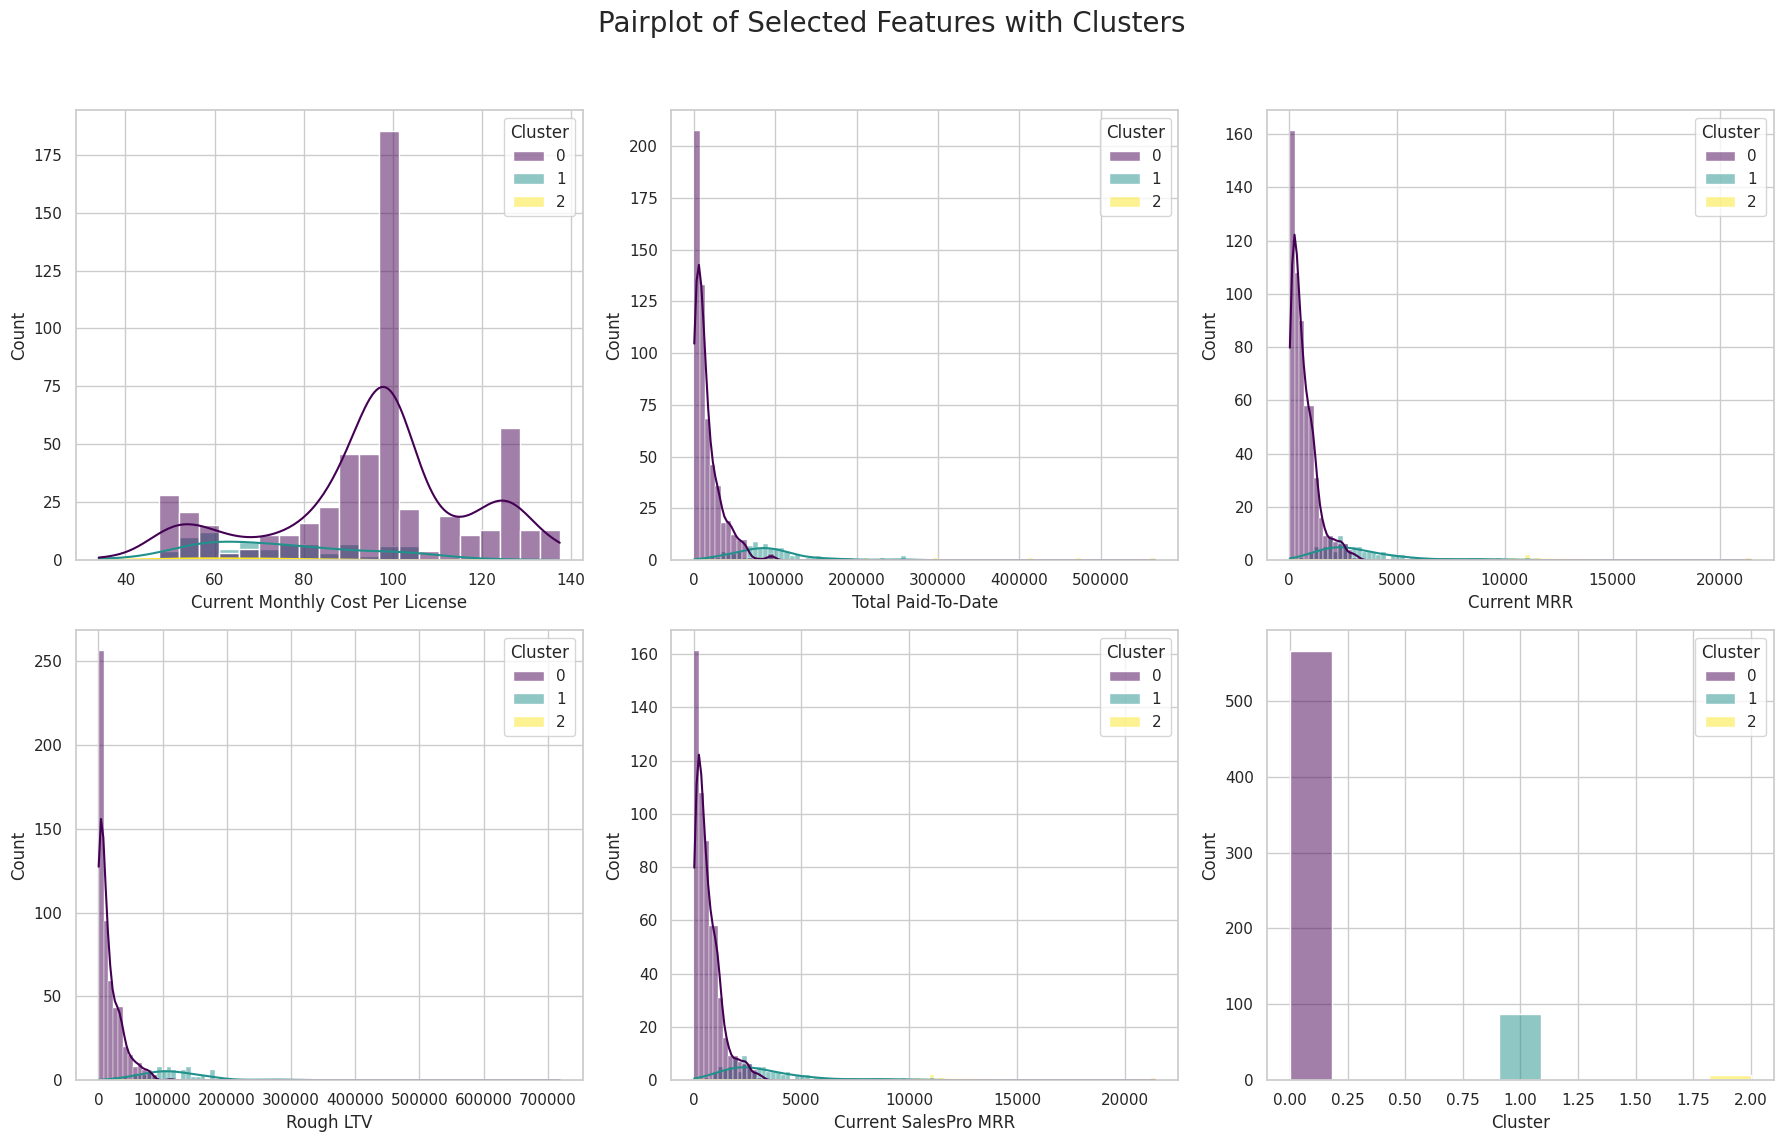

In [ ]:
# Pairplot
sns.set(style="whitegrid")
features_for_pairplot = ['Current Monthly Cost Per License', 'Total Paid-To-Date', 'Current MRR', 'Rough LTV', 'Current SalesPro MRR', 'Cluster']

# Divide pairplot into six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Pairplot of Selected Features with Clusters', size=20)

for i in range(len(features_for_pairplot)):
    row, col = divmod(i, 3)
    sns.histplot(data=df, x=features_for_pairplot[i], hue='Cluster', kde=True, palette='viridis', ax=axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

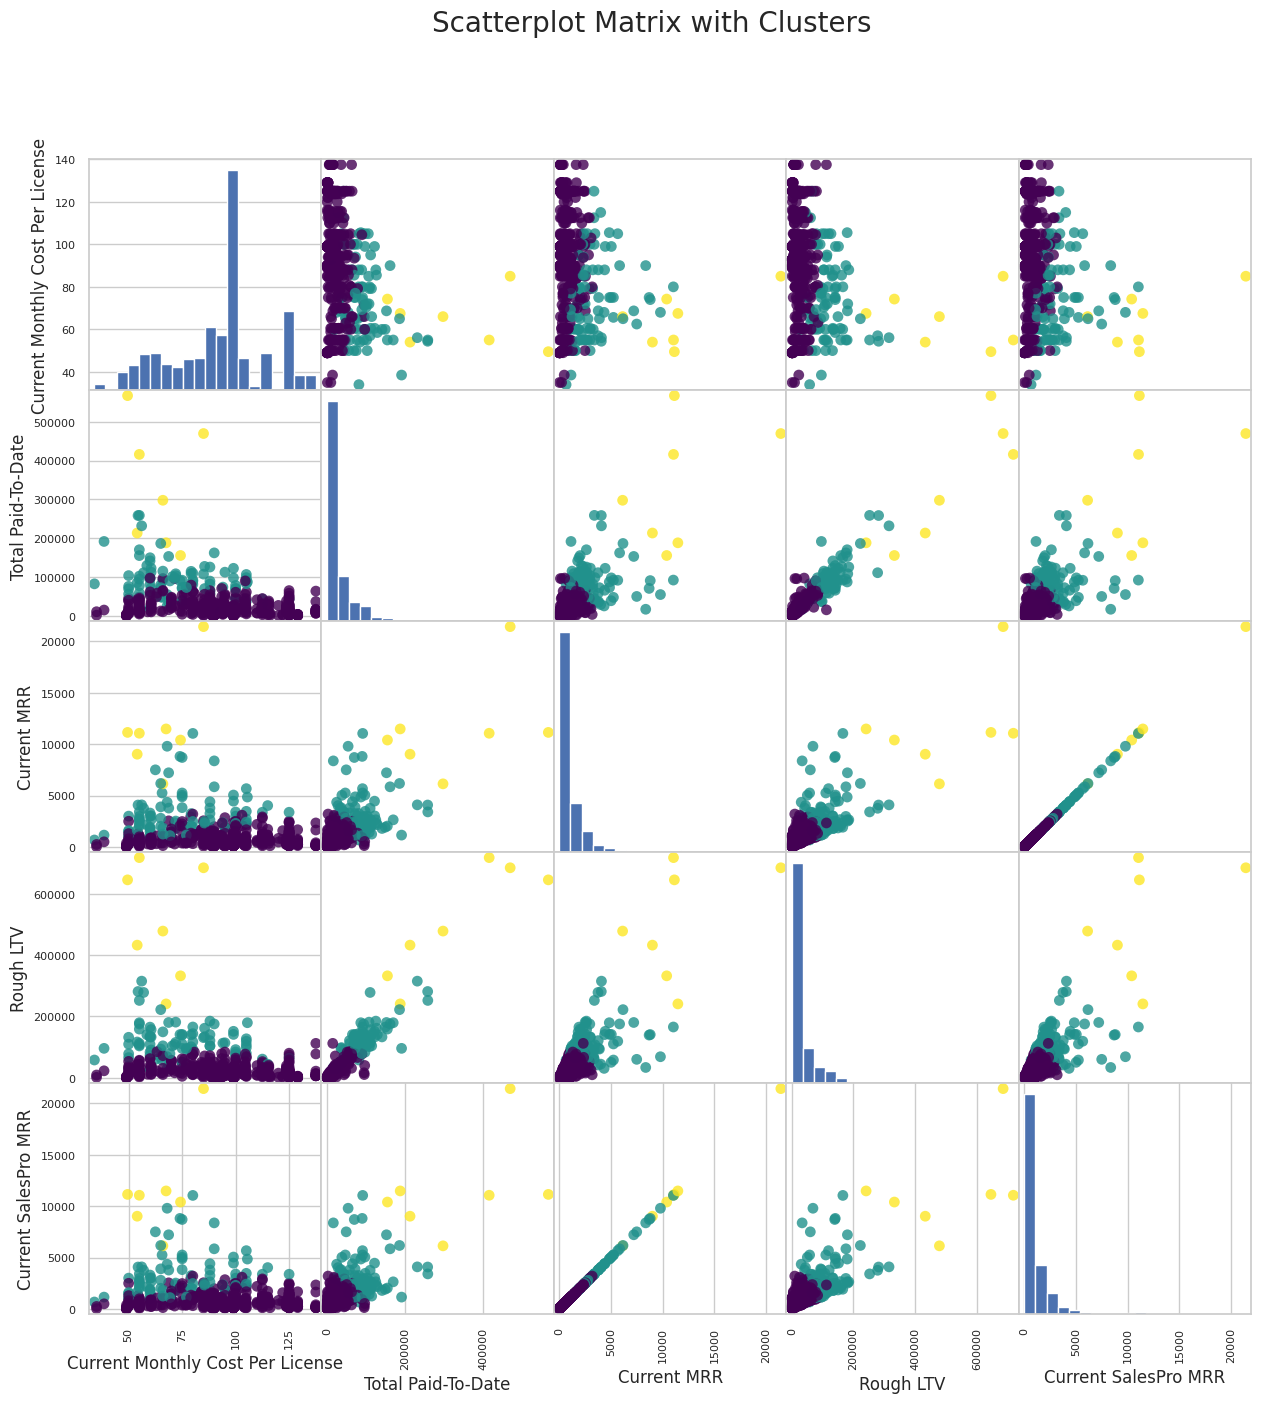

In [ ]:
# Scatterplot Matrix
scatter_matrix = pd.plotting.scatter_matrix(df[selected_features], c=df['Cluster'], marker='o', figsize=(15, 15), hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='viridis')
plt.suptitle('Scatterplot Matrix with Clusters', size=20)
plt.show()

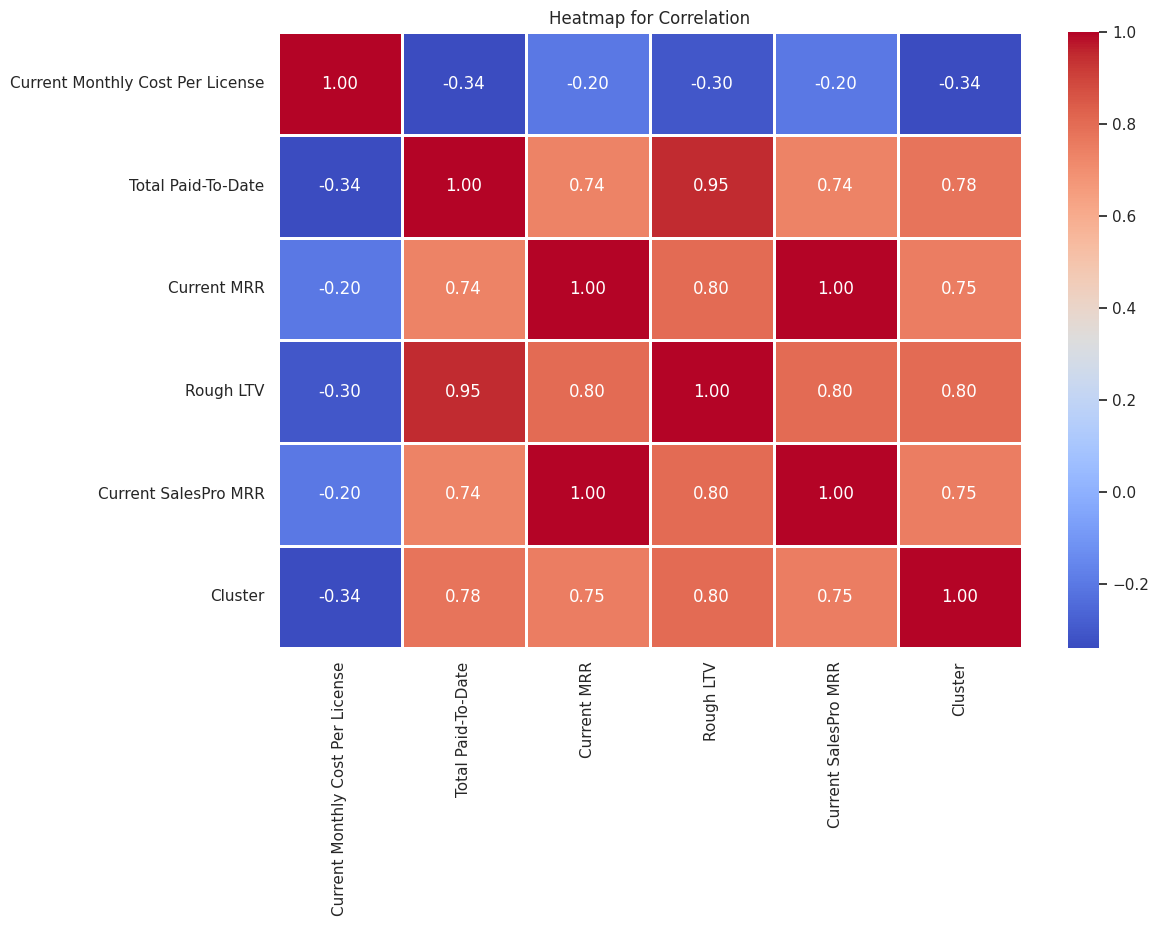

In [ ]:
# Heatmap for Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df[selected_features + ['Cluster']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Heatmap for Correlation')
plt.show()

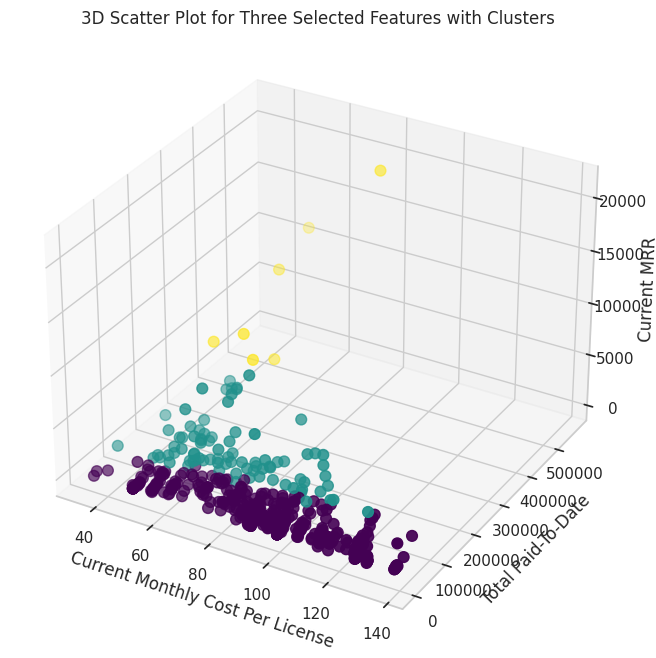

In [ ]:
# 3D Scatter Plot for Three Selected Features
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[selected_features[0]], df[selected_features[1]], df[selected_features[2]], c=df['Cluster'], cmap='viridis', s=60)
ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
ax.set_title('3D Scatter Plot for Three Selected Features with Clusters')
plt.show()

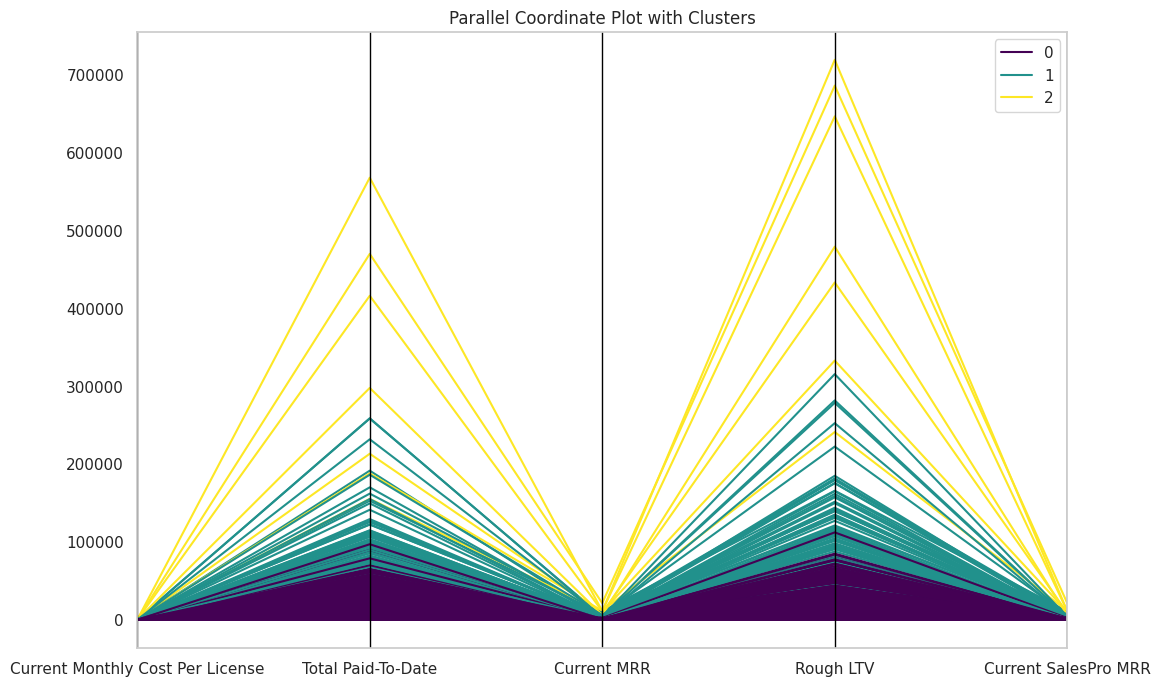

In [ ]:
# Parallel Coordinate Plot
plt.figure(figsize=(12, 8))
parallel_coordinates(df[selected_features + ['Cluster']], 'Cluster', colormap='viridis')
plt.title('Parallel Coordinate Plot with Clusters')
plt.show()

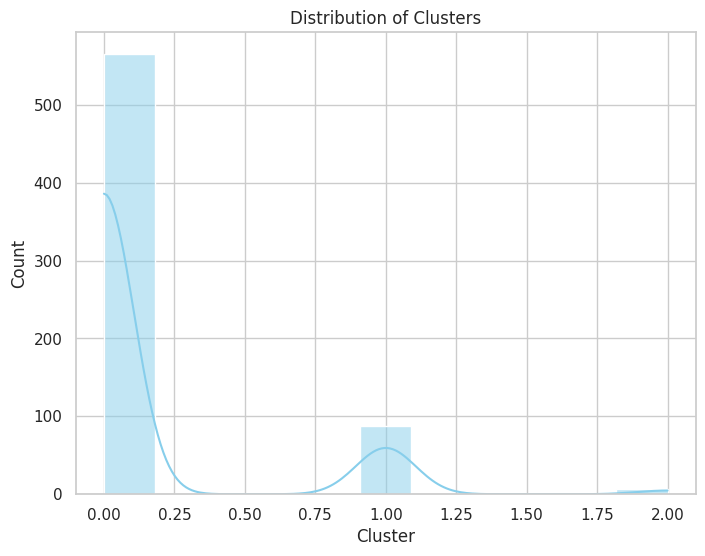

In [ ]:
# Histogram of Cluster Distribution
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
sns.histplot(data=df, x='Cluster', kde=True, color='skyblue')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


<ipython-input-18-e4bd0183d735>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Cluster', data=df, palette='viridis')


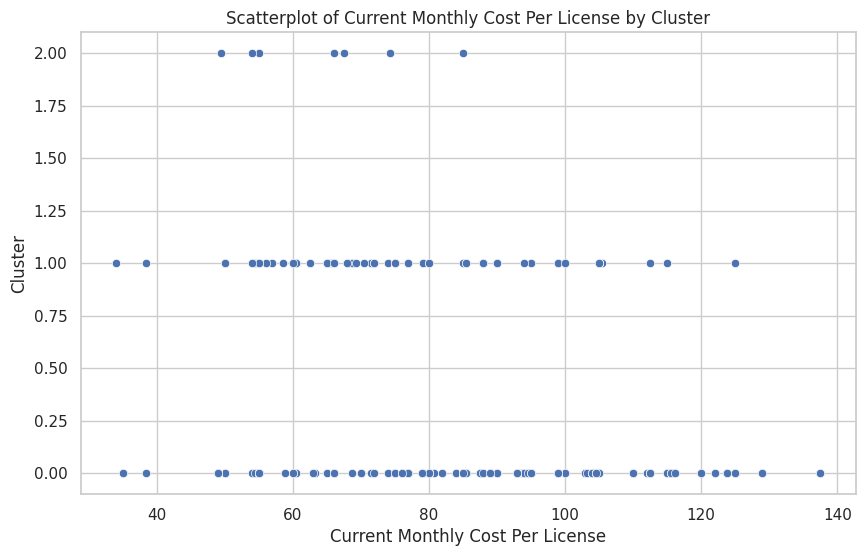

<ipython-input-18-e4bd0183d735>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Cluster', data=df, palette='viridis')


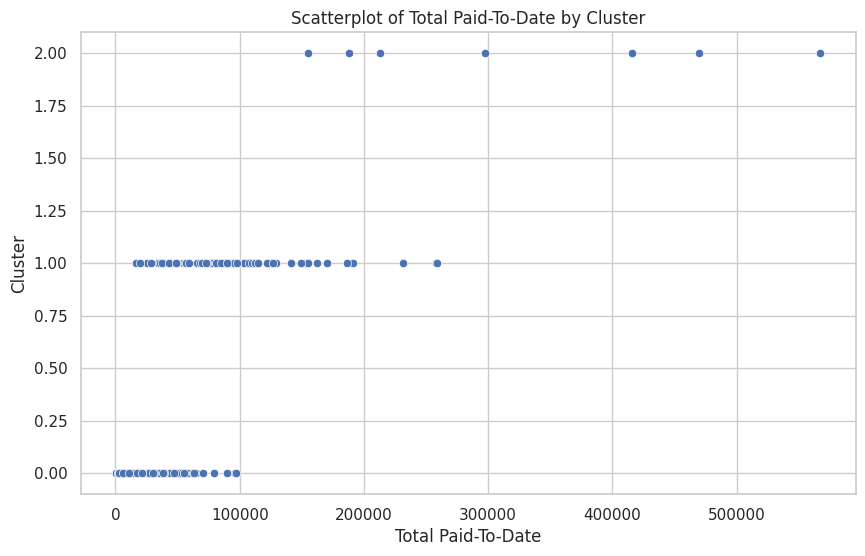

<ipython-input-18-e4bd0183d735>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Cluster', data=df, palette='viridis')


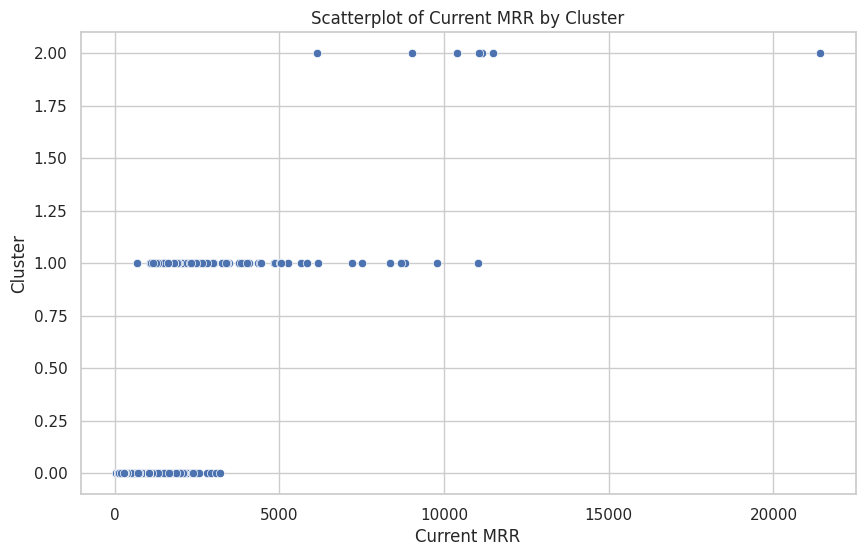

<ipython-input-18-e4bd0183d735>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Cluster', data=df, palette='viridis')


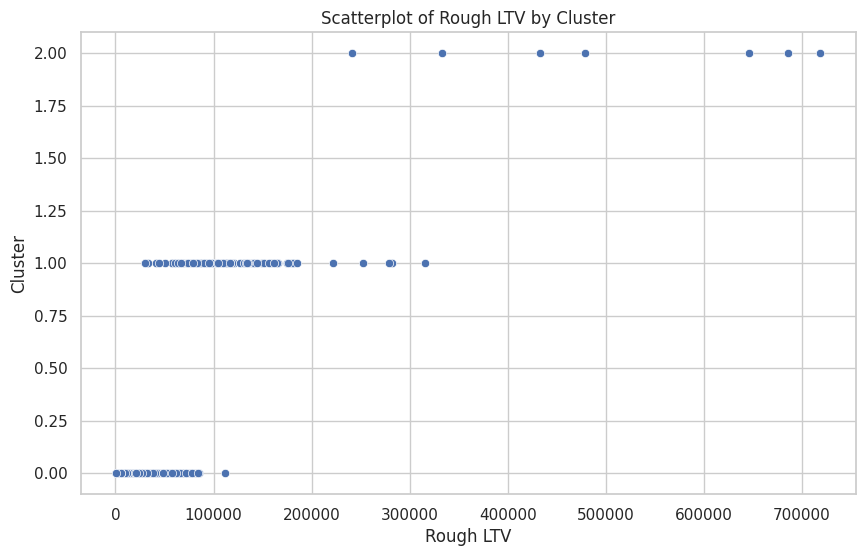

<ipython-input-18-e4bd0183d735>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Cluster', data=df, palette='viridis')


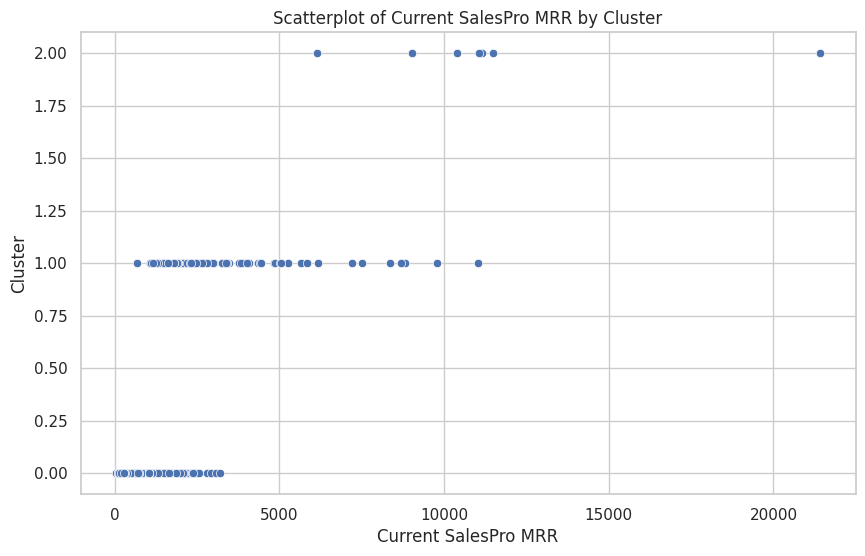

In [ ]:
# Scatterplot of Selected Features by Cluster
for feature in selected_features:
    plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
    sns.scatterplot(x=feature, y='Cluster', data=df, palette='viridis')
    plt.title(f'Scatterplot of {feature} by Cluster')
    plt.show()

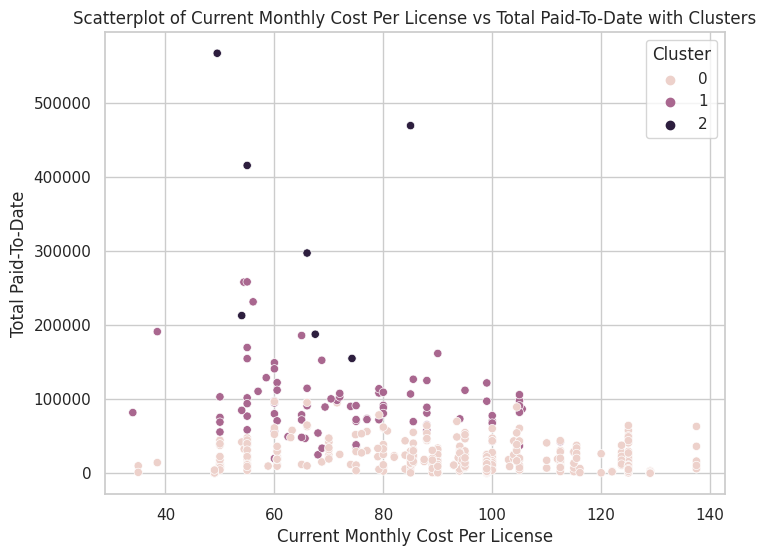

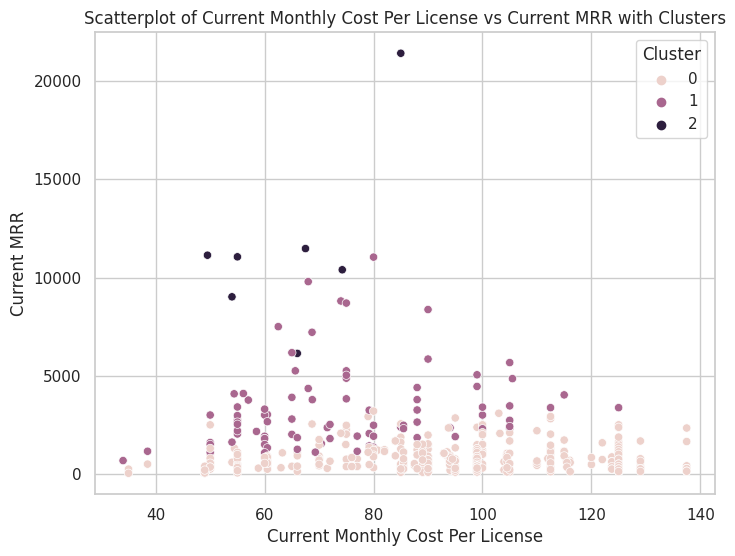

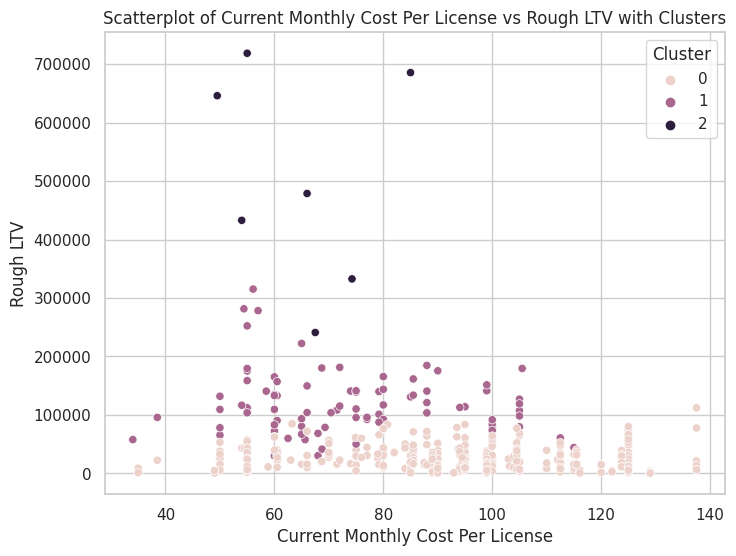

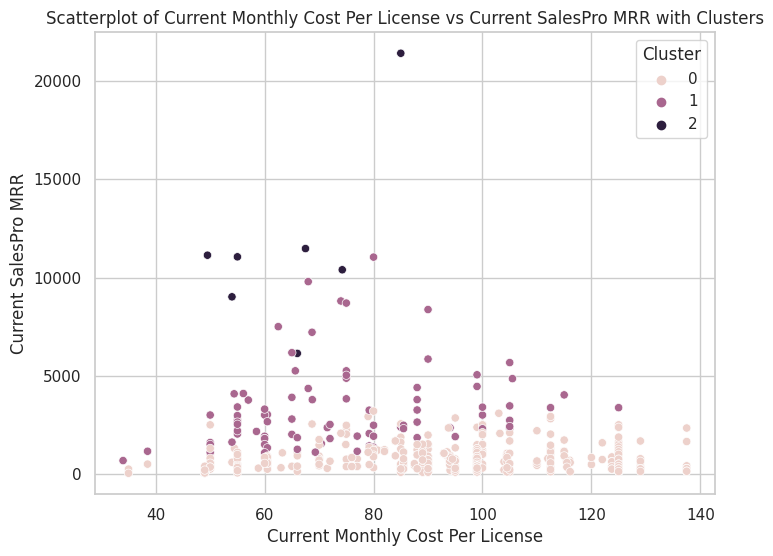

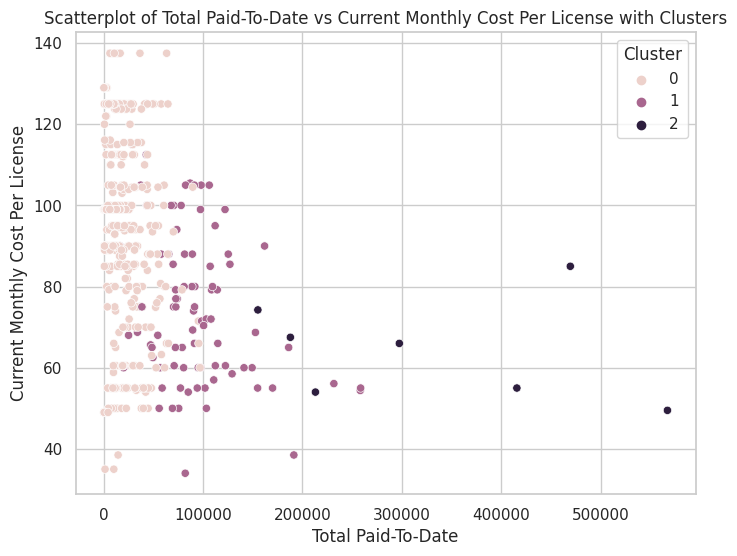

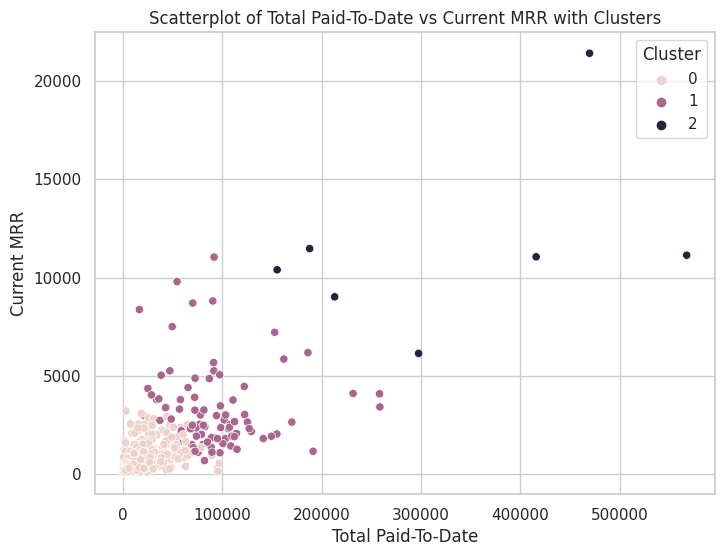

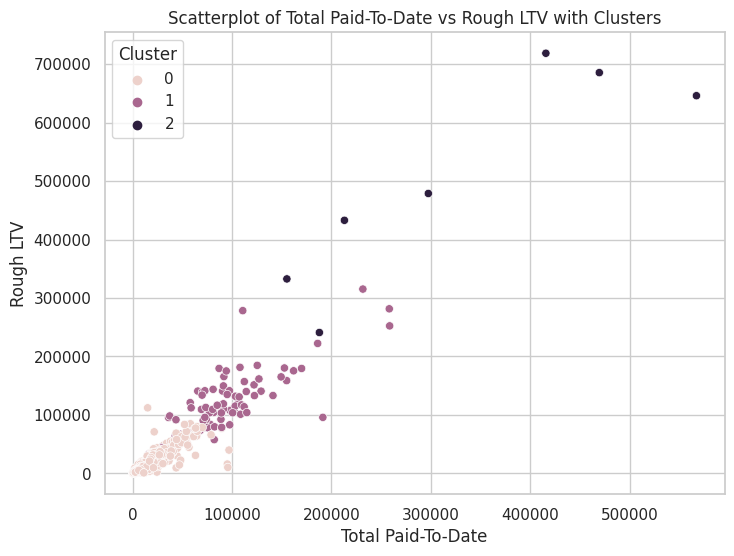

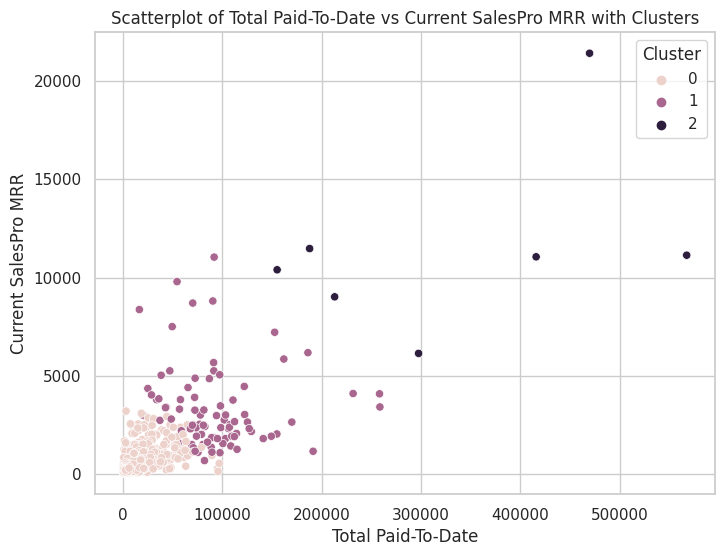

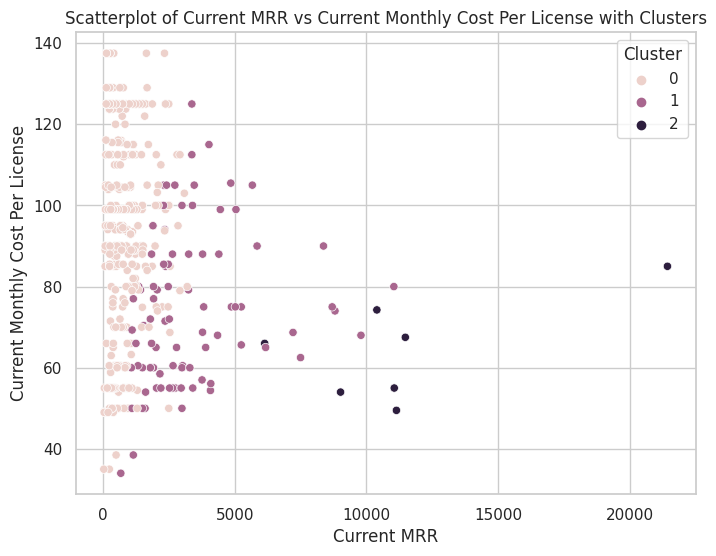

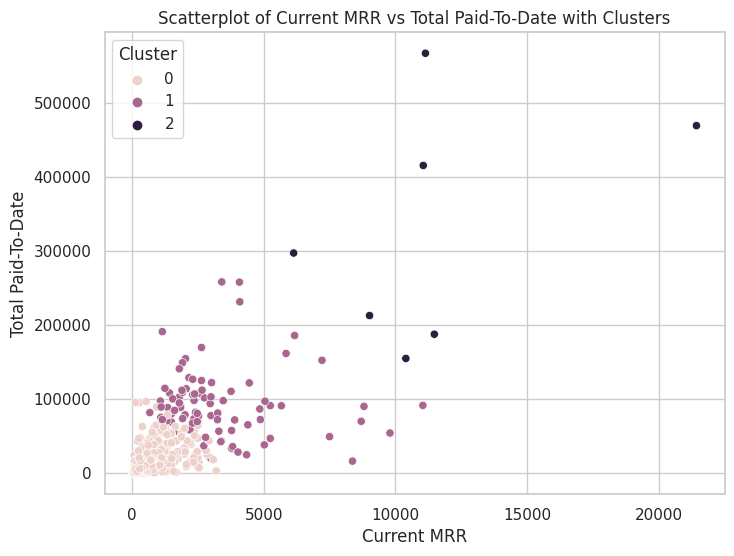

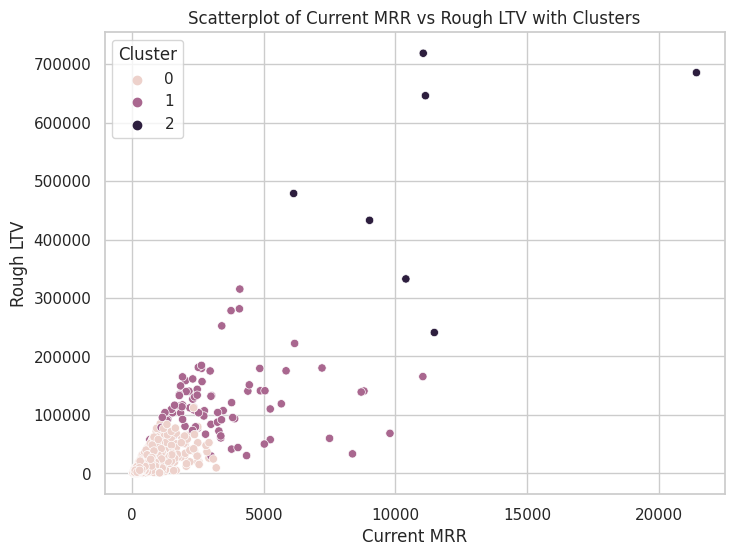

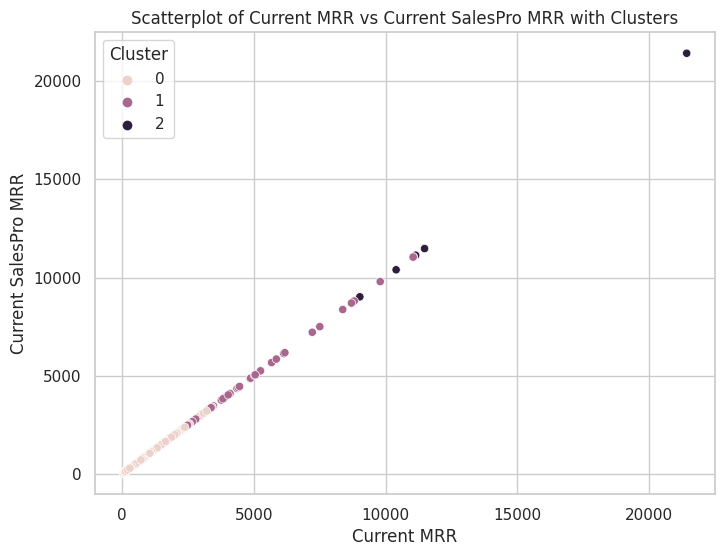

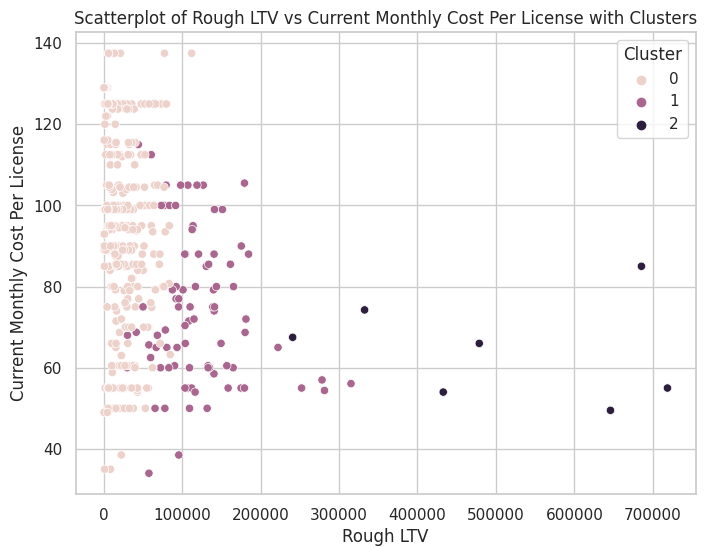

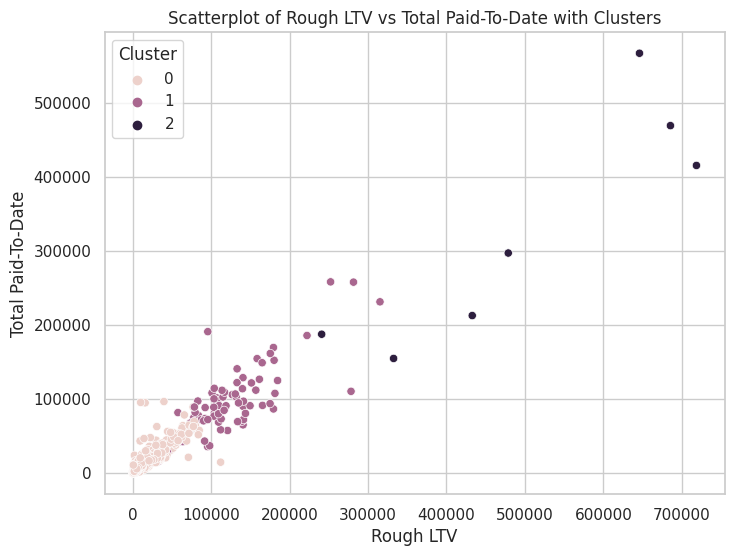

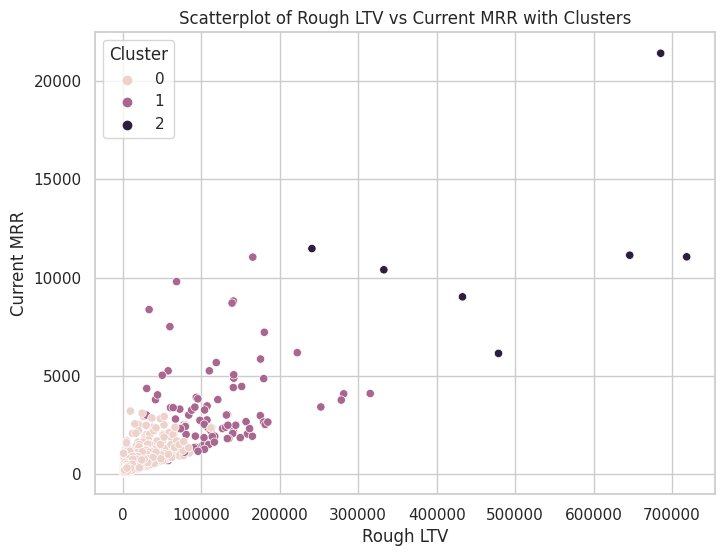

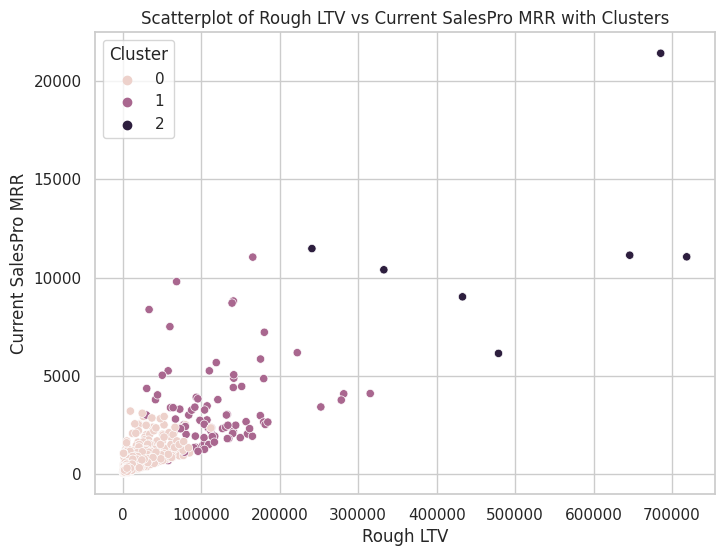

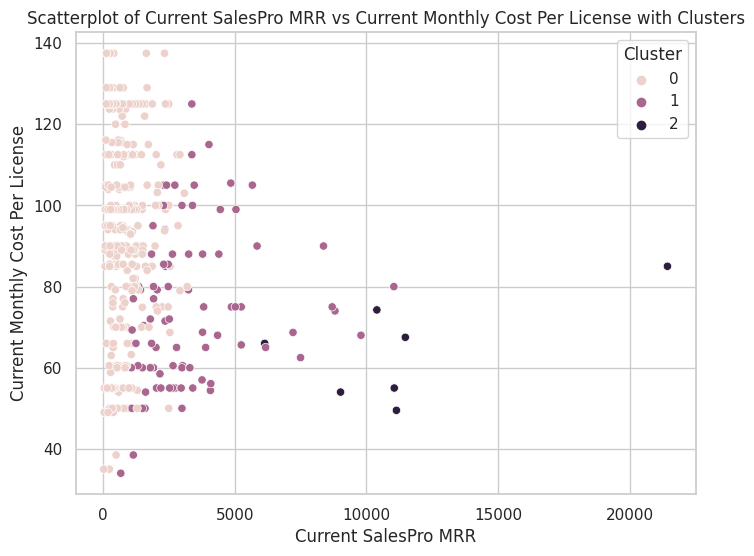

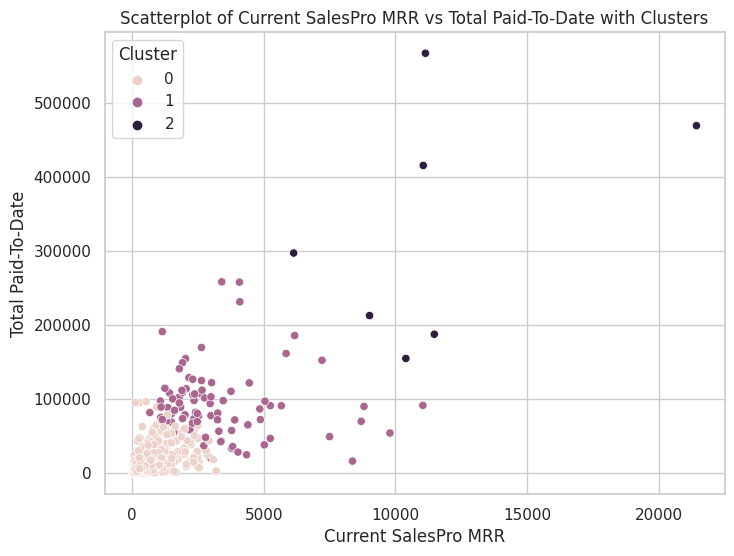

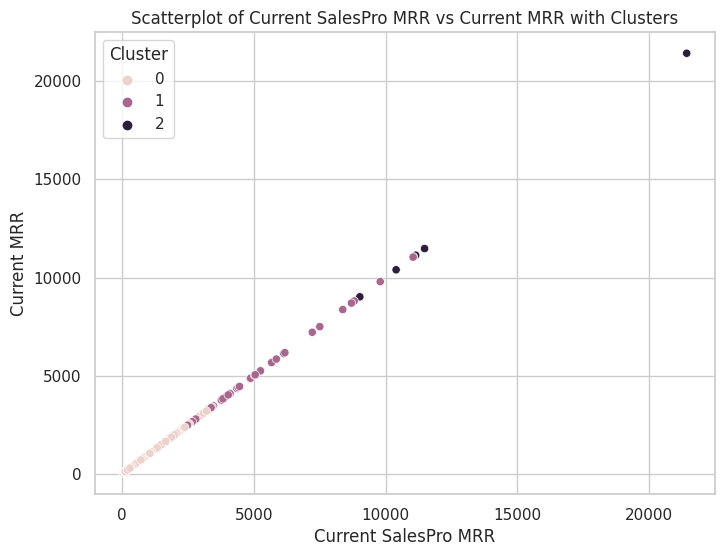

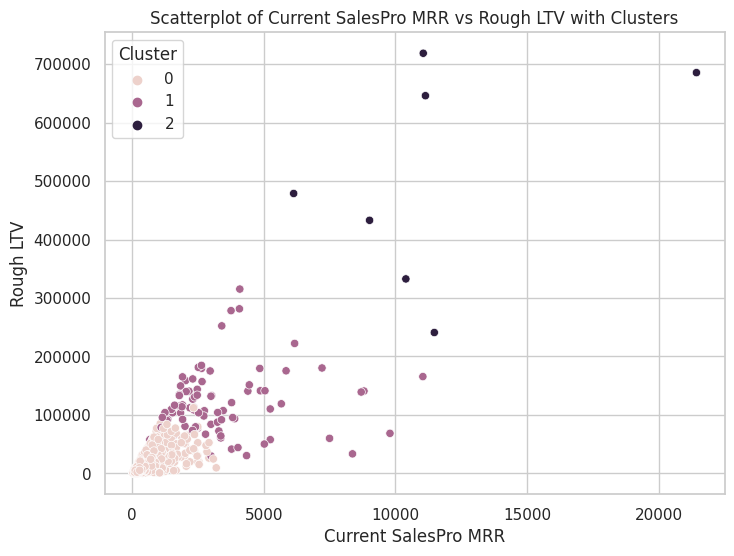

In [ ]:
for feature1 in selected_features:
    for feature2 in selected_features:
        if feature1 != feature2:
            plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
            sns.scatterplot(x=feature1, y=feature2, hue='Cluster', data=df)  # Removed palette parameter
            plt.title(f'Scatterplot of {feature1} vs {feature2} with Clusters')
            plt.show()

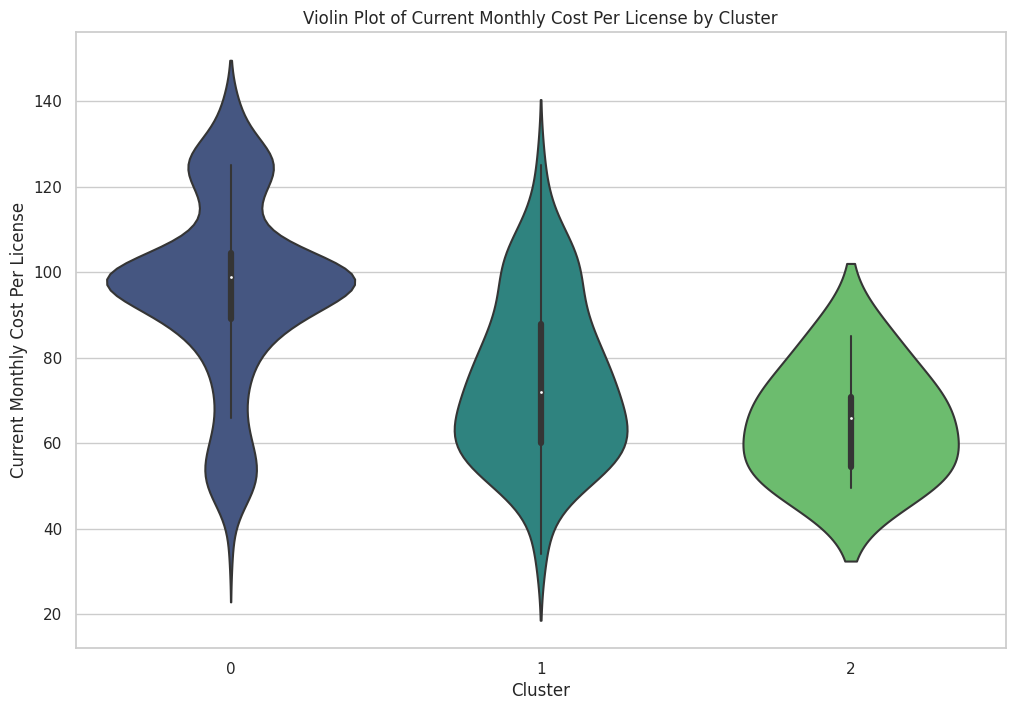

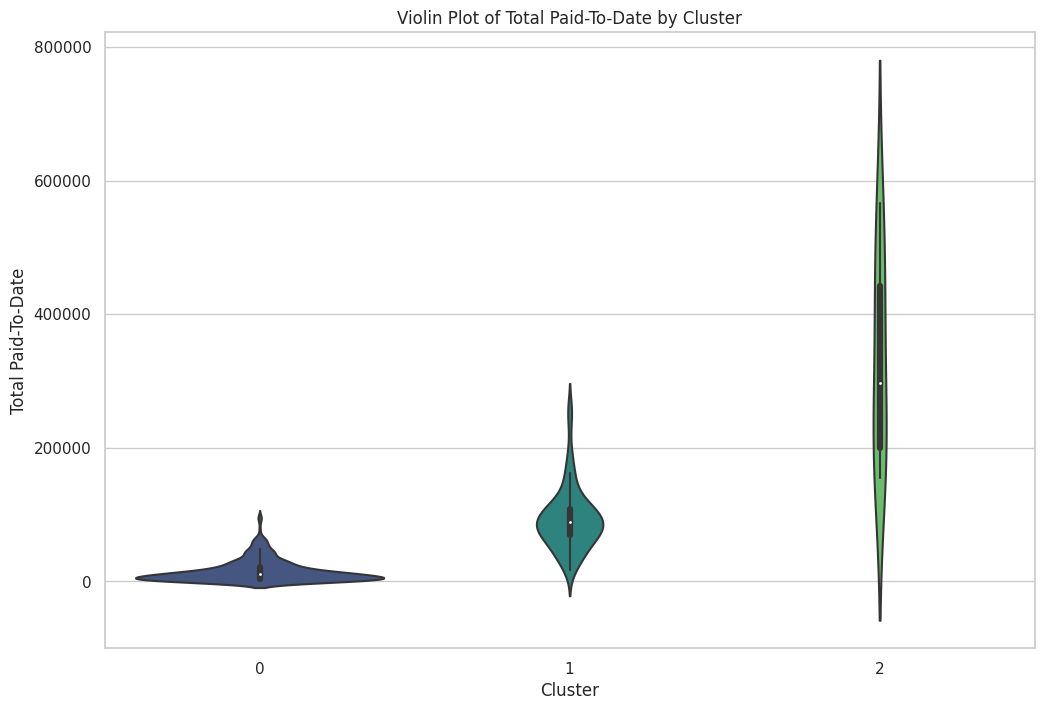

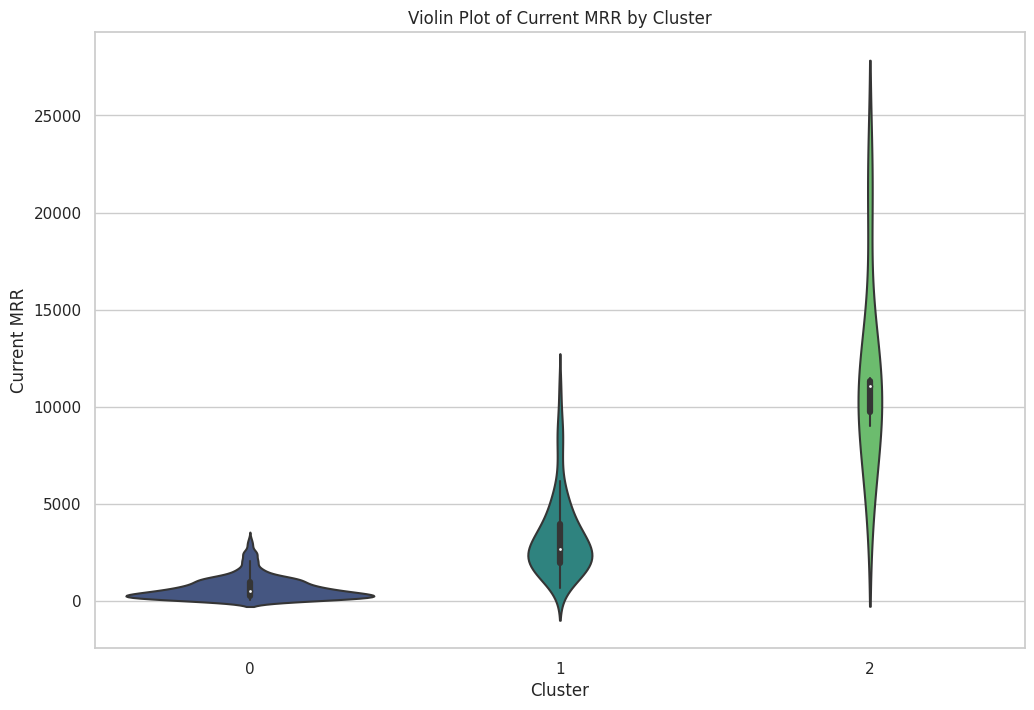

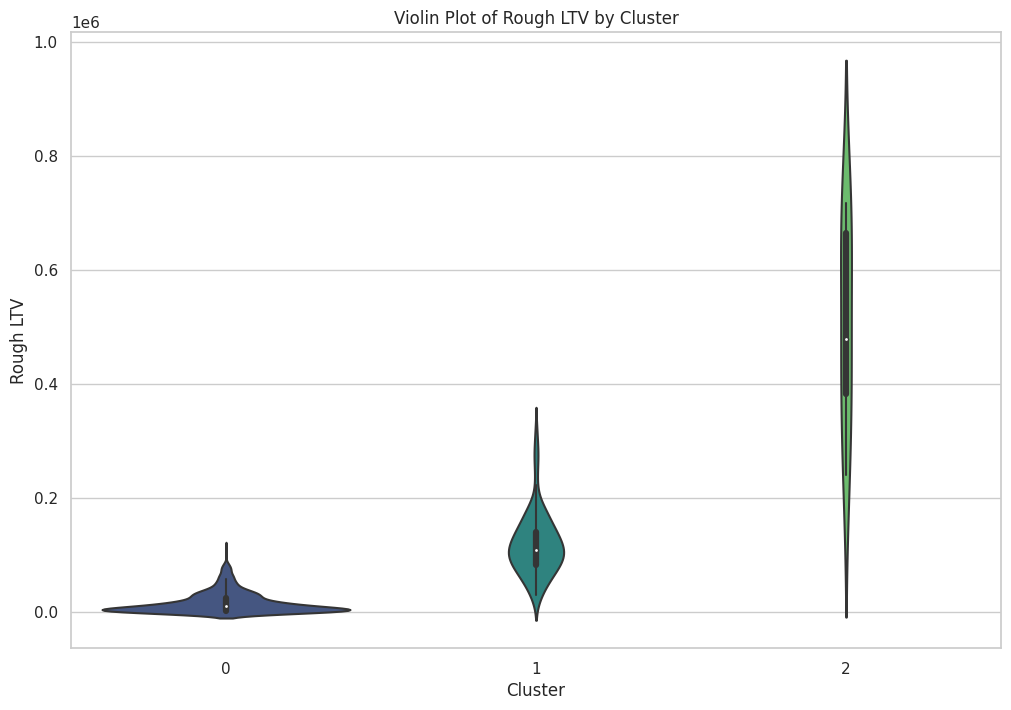

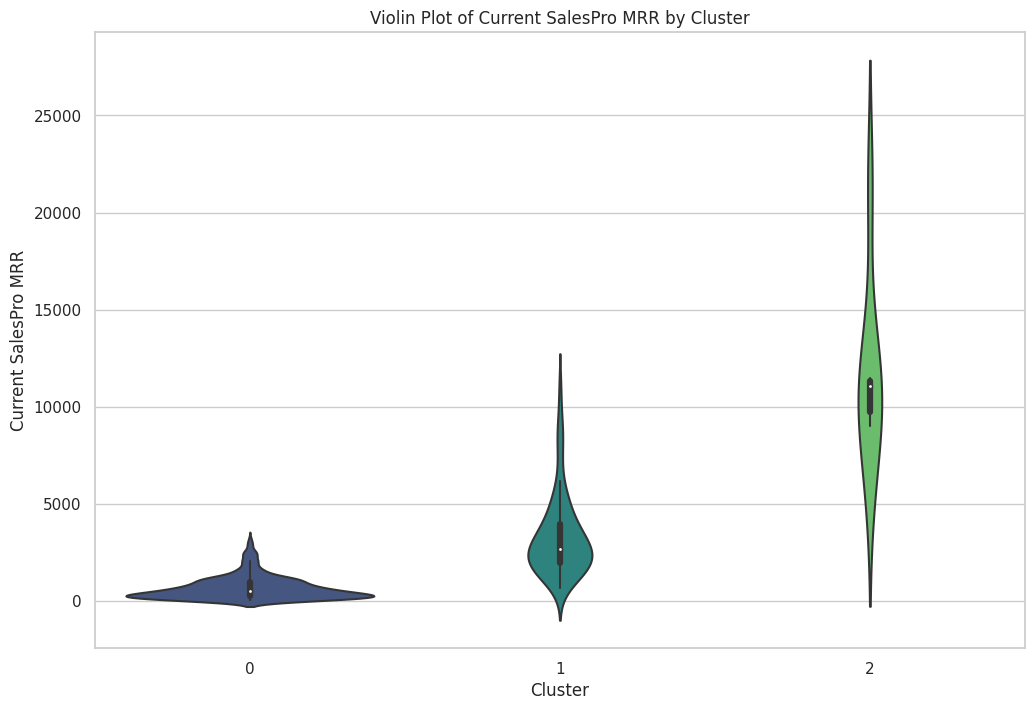

In [ ]:
#Violin Plots for Feature Distributions by Cluster
for feature in selected_features:
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Violin Plot of {feature} by Cluster')
    plt.show()

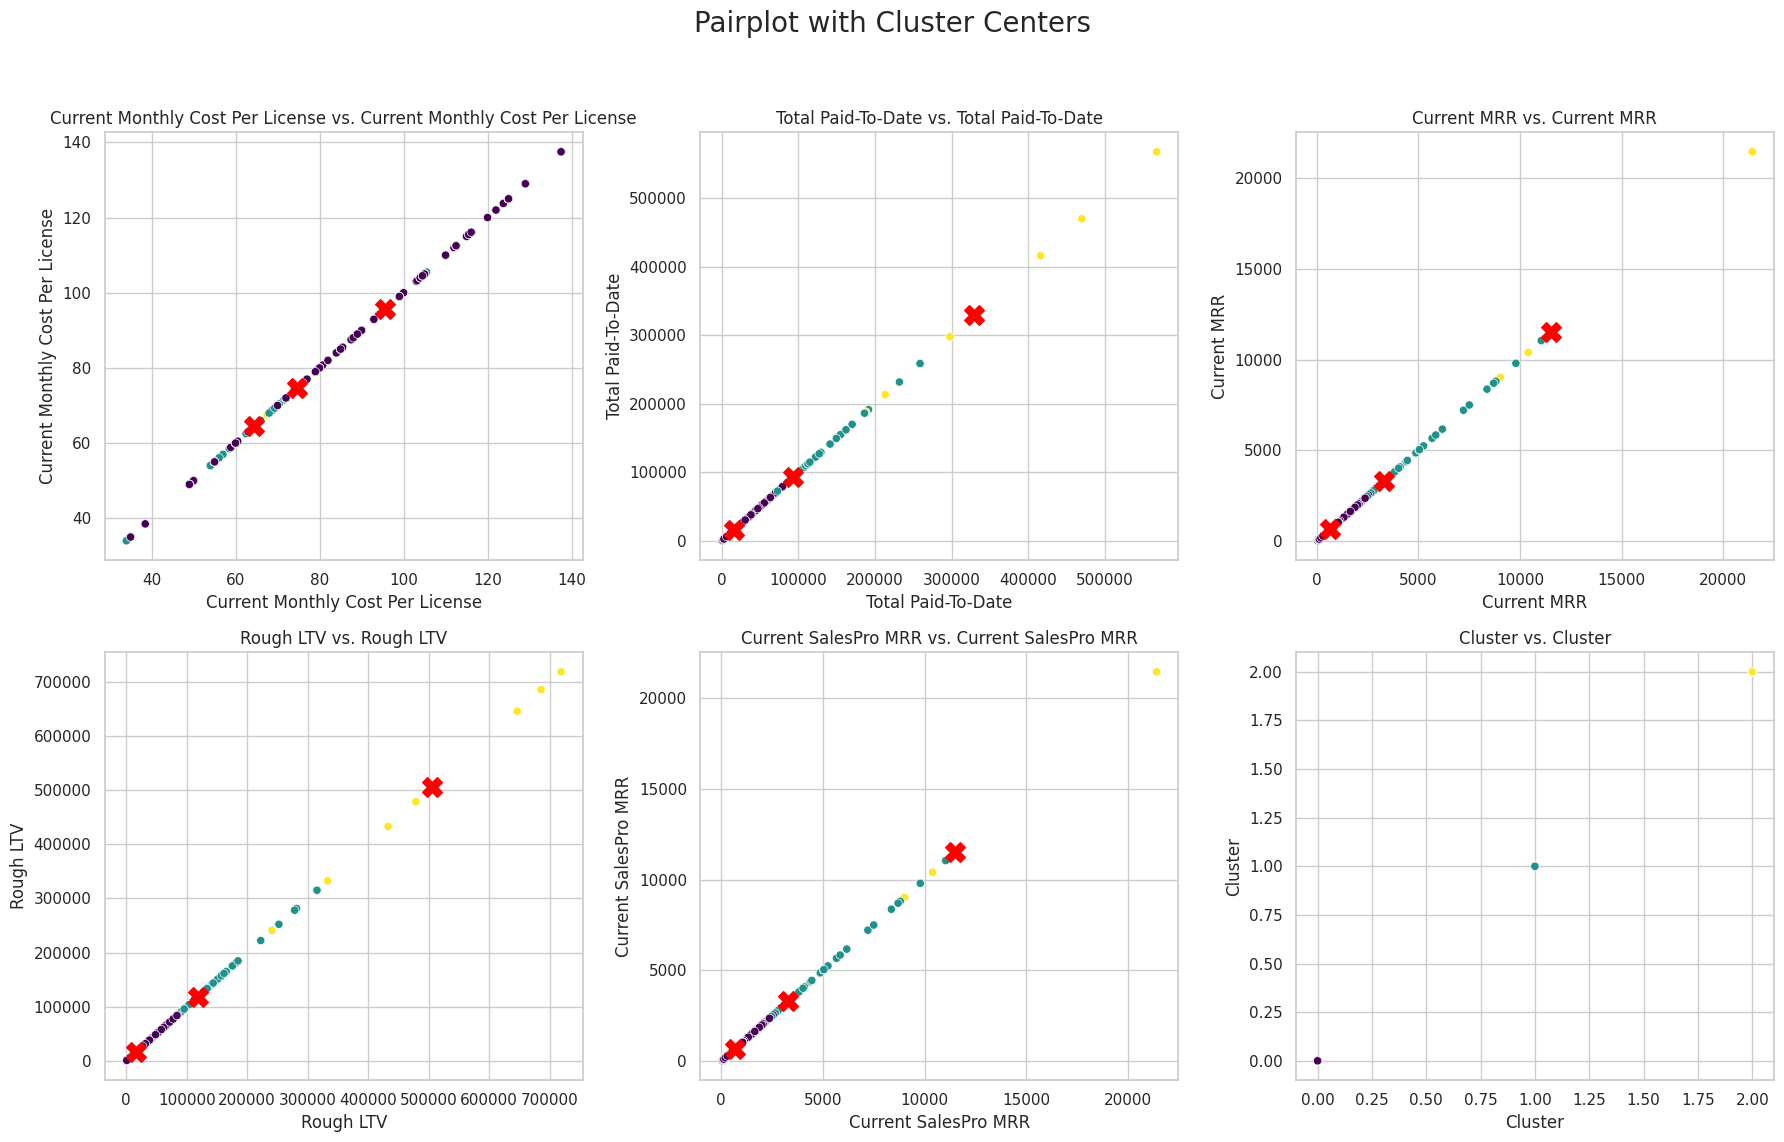

In [ ]:
# 2. Cluster Centers on Pairplot
pairplot_data_with_centers = df.copy()
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
pairplot_data_with_centers[selected_features] = scaler.inverse_transform(df_scaled)
pairplot_data_with_centers['Cluster'] = df['Cluster']

sns.set(style="whitegrid")
features_for_pairplot_with_centers = selected_features + ['Cluster']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Pairplot with Cluster Centers', size=20)

for i in range(len(features_for_pairplot_with_centers)):
    row, col = divmod(i, 3)
    sns.scatterplot(data=pairplot_data_with_centers, x=features_for_pairplot_with_centers[i], y=features_for_pairplot_with_centers[i], hue='Cluster', palette='viridis', ax=axes[row, col], legend=False)

    if i < len(cluster_centers[0]):
        axes[row, col].scatter(cluster_centers[:, i], cluster_centers[:, i], marker='X', s=200, color='red', label='Cluster Centers')

    axes[row, col].set_title(f'{features_for_pairplot_with_centers[i]} vs. {features_for_pairplot_with_centers[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

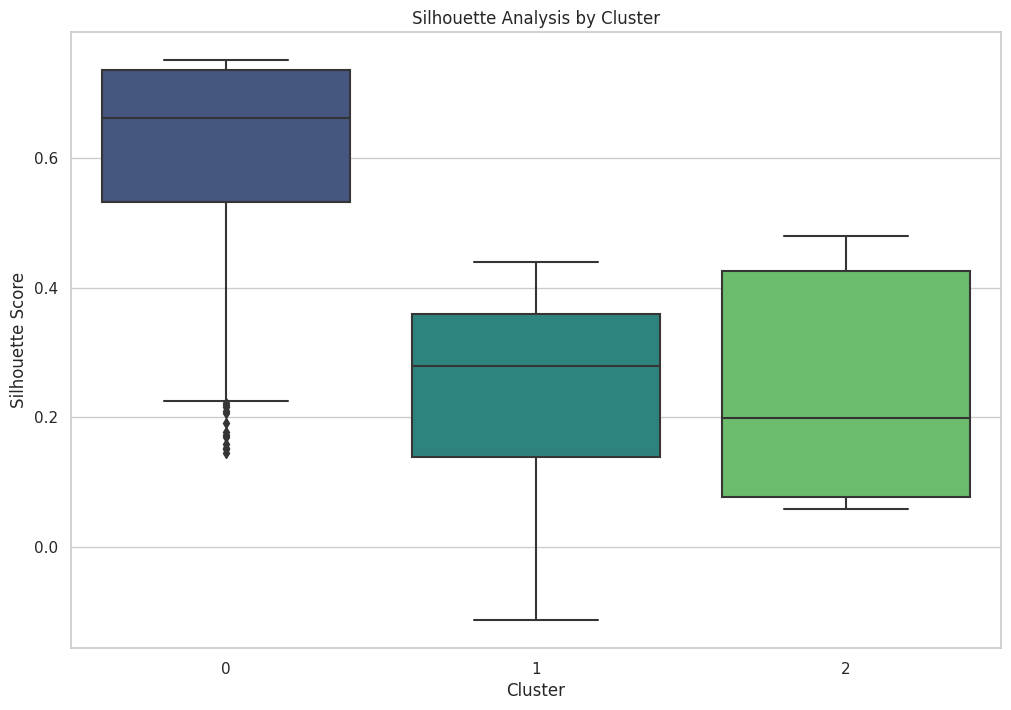

In [ ]:
# 3. Silhouette Analysis
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_values = silhouette_samples(df_scaled, df['Cluster'])
df['Silhouette'] = silhouette_values

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Silhouette', data=df, palette='viridis')
plt.title('Silhouette Analysis by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()


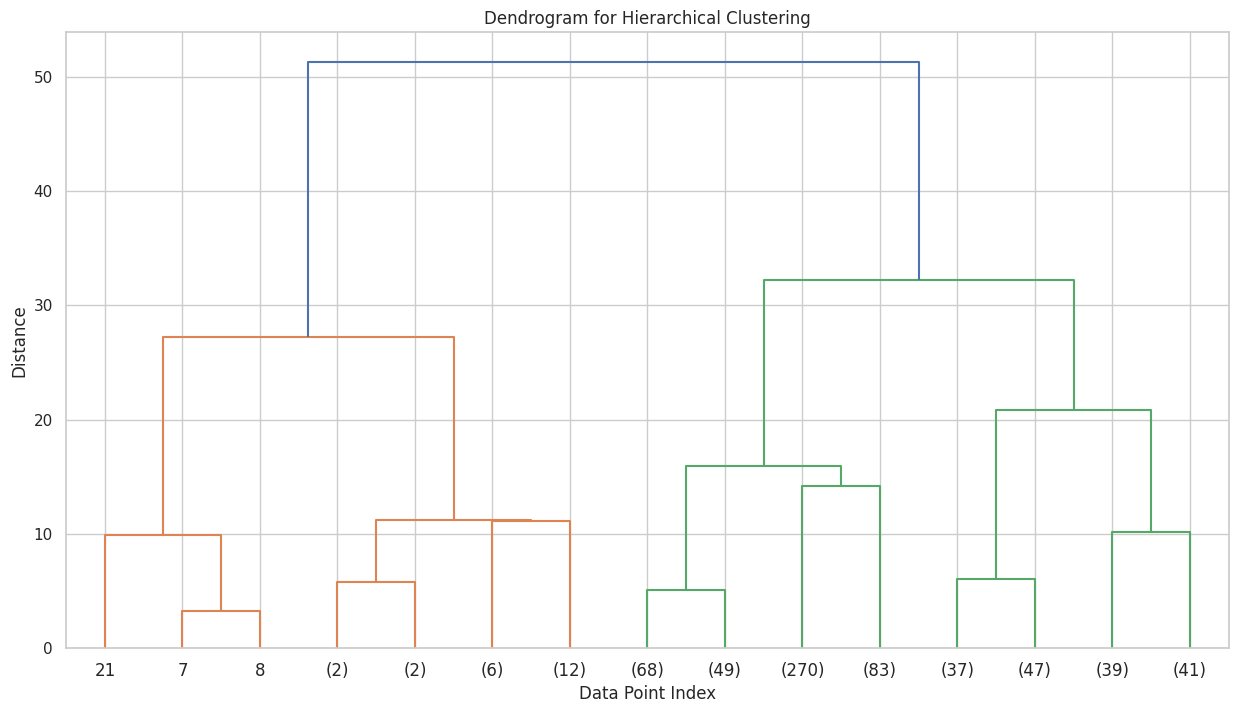

In [ ]:
# 4. Dendrogram for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_scaled, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()
